In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Just Varying the number of observations made. Kept training data constant at array of size 100 

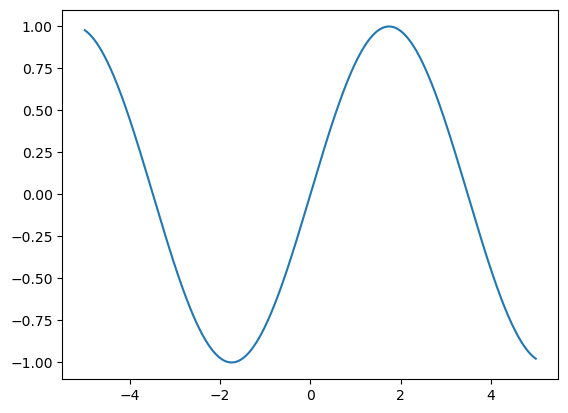

In [3]:
# The true function 
def f(x):
    return np.sin(0.9*x)

x = np.linspace(-5,5,1000)

plt.plot(x,f(x))
plt.show()

In [4]:
def Kernel(a,b):
    # we take len(a) = len(b)
    n= len(a)
    q= len(b)
    sqrdist = np.zeros((n,q))
    for j in range(0,n):
        for i in range(0,q):
           sqrdist[j,i] = (a[j]-b[i])**2 
    return np.exp(-1/2*(sqrdist))

In [5]:
# # Test points
# nobs = 4
# x = np.linspace(0,5,nobs)
# y = f(x)
# ntest = 1000
# Xtest = np.linspace(0,5,ntest)
# # sigma = noise level
# sigma = 0.05
# #L = np.linalg.cholesky(Kernel(x,x)+sigma**2*np.identity(n)**2)
# A = Kernel(x,x)+sigma**2*np.identity(nobs)**2
# ## This produces a matrix such that L*Lt = Kernel(x,x)+sigma**2*np.identity(n)**2
# Ainv =np.linalg.inv(A)
# fstar = Kernel(Xtest,x)@Ainv@y
# varf = Kernel(Xtest,Xtest)-Kernel(Xtest,x)@Ainv@Kernel(x,Xtest)
# varfxtest = varf.diagonal()
# plt.scatter(x,f(x),marker = "*",s=100,color='black',label='test points')
# plt.plot(Xtest,fstar,'r--',label="mean")
# plt.plot(Xtest,fstar+2*np.sqrt(varfxtest),color = 'black',label = "+-2std")
# plt.plot(Xtest,fstar-2*np.sqrt(varfxtest),color = 'black')
# plt.plot(Xtest,f(Xtest),color='blue',label='true')
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.show()

In [6]:
def GPR(Nobs,Ntest):
    x = np.linspace(0,5,Nobs)
    y = f(x)
    Xtest = np.linspace(0,5,Ntest)
    # sigma = noise level
    sigma = 0.05
    #L = np.linalg.cholesky(Kernel(x,x)+sigma**2*np.identity(n)**2)
    A = Kernel(x,x)+sigma**2*np.identity(Nobs)
    ## This produces a matrix such that L*Lt = Kernel(x,x)+sigma**2*np.identity(n)**2
    Ainv =np.linalg.inv(A)
    fstar = Kernel(Xtest,x)@Ainv@y
    varf = Kernel(Xtest,Xtest)-Kernel(Xtest,x)@Ainv@Kernel(x,Xtest)
    varfxtest = varf.diagonal()
    plt.scatter(x,f(x),marker = "*",s=100,color='black',label='test points')
    plt.plot(Xtest,fstar,'r--',label="mean")
    plt.plot(Xtest,fstar+2*np.sqrt(varfxtest),color = 'black',label = "+-2std")
    plt.plot(Xtest,fstar-2*np.sqrt(varfxtest),color = 'black')
    plt.plot(Xtest,f(Xtest),color='blue',label='true')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

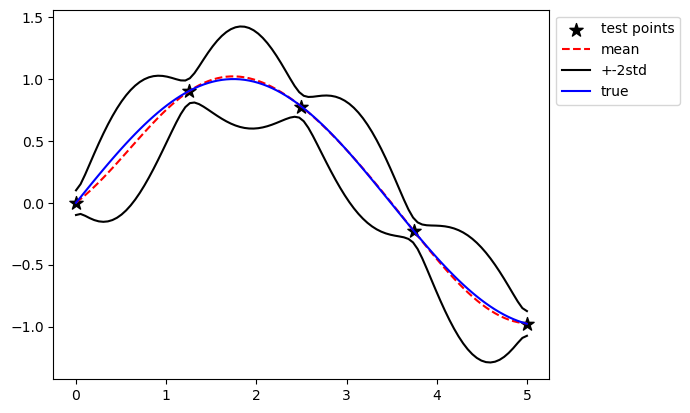

In [7]:
GPR(5,100)

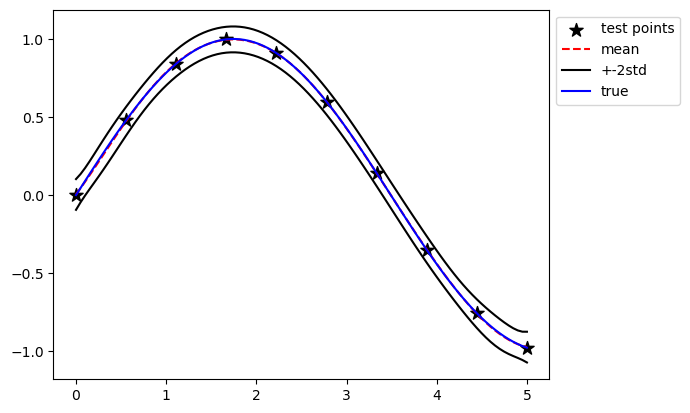

In [8]:
GPR(10,100)

In [9]:
def GPR(Nobs,Ntest):
    x = np.linspace(0,5,Nobs)
    y = f(x)
    Xtest = np.linspace(0,5,Ntest)
    # sigma = noise level
    sigma = 0.05
    #L = np.linalg.cholesky(Kernel(x,x)+sigma**2*np.identity(n)**2)
    A = Kernel(x,x)+sigma**2*np.identity(Nobs)
    ## This produces a matrix such that L*Lt = Kernel(x,x)+sigma**2*np.identity(n)**2
    Ainv =np.linalg.inv(A)
    fstar = Kernel(Xtest,x)@Ainv@y
    varf = Kernel(Xtest,Xtest)-Kernel(Xtest,x)@Ainv@Kernel(x,Xtest)
    varfxtest = varf.diagonal()
    std=np.sqrt(varfxtest)
    return Xtest,fstar,std


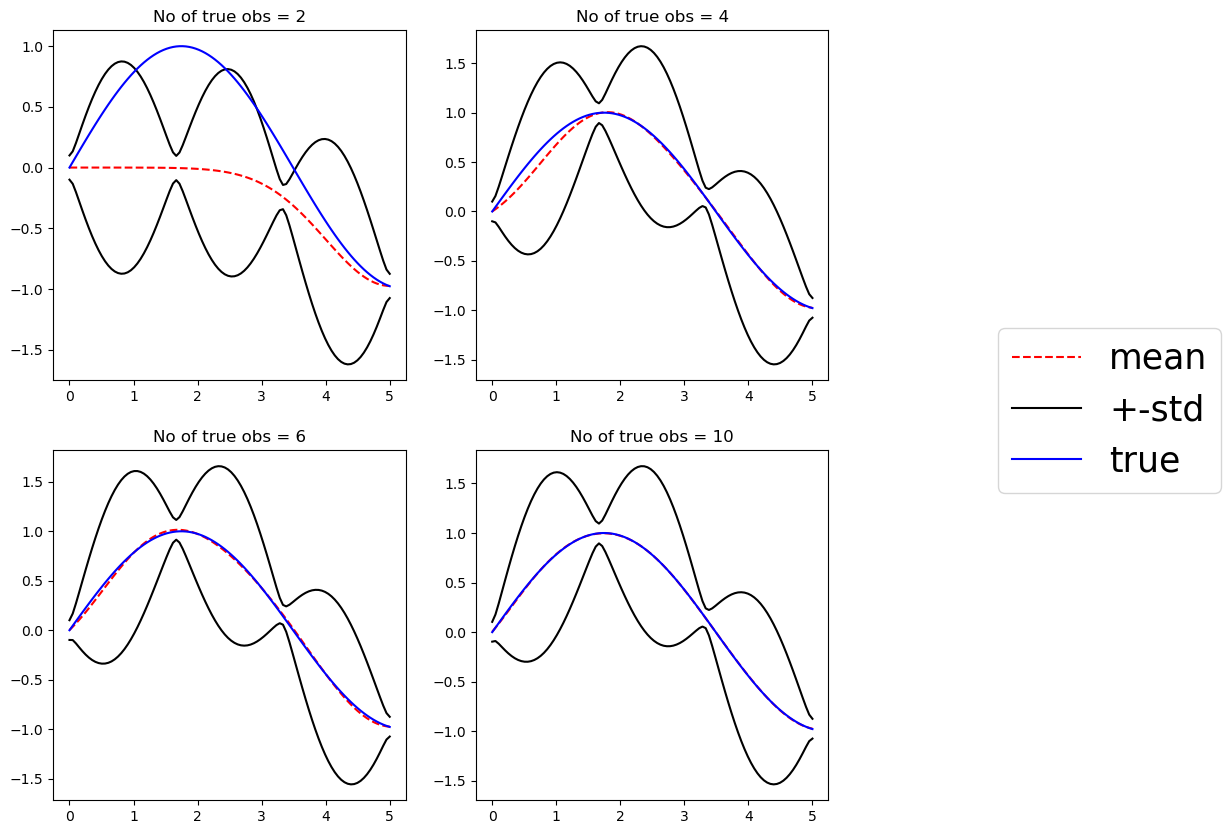

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
obs=np.array([2,4,6,10])
n=0
axs[0,0].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1],'r--',label="mean")
axs[0,0].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1]+2*GPR(4,100)[2],color='black',label="+-std")
axs[0,0].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1]-2*GPR(4,100)[2],color='black')
axs[0,0].plot(GPR(obs[n],100)[0],f(GPR(obs[n],100)[0]),color='blue',label='true')
axs[0,0].set_title("No of true obs = %.0f"%obs[n])
n=1
axs[0,1].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1],'r--')
axs[0,1].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1]+2*GPR(4,100)[2],color='black')
axs[0,1].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1]-2*GPR(4,100)[2],color='black')
axs[0,1].plot(GPR(obs[n],100)[0],f(GPR(obs[n],100)[0]),color='blue')
axs[0,1].set_title("No of true obs = %.0f"%obs[n])
n=2
axs[1,0].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1],'r--')
axs[1,0].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1]+2*GPR(4,100)[2],color='black')
axs[1,0].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1]-2*GPR(4,100)[2],color='black')
axs[1,0].plot(GPR(obs[n],100)[0],f(GPR(obs[n],100)[0]),color='blue')
axs[1,0].set_title("No of true obs = %.0f"%obs[n])
n=3
axs[1,1].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1],'r--')
axs[1,1].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1]+2*GPR(4,100)[2],color='black')
axs[1,1].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1]-2*GPR(4,100)[2],color='black')
axs[1,1].plot(GPR(obs[n],100)[0],f(GPR(obs[n],100)[0]),color='blue')
axs[1,1].set_title("No of true obs = %.0f"%obs[n])


fig.legend(
           loc='center left', 
           bbox_to_anchor=(1, 0.5),     # Positioning outside the plot
           prop={'size':25},           # Increase font size for bigger legend
           frameon=True,                # Add box around the legend
           borderaxespad=2) 
plt.show()

# Now adding in $\sigma$ and $l$

In [12]:
def Kernel(a,b,sigma,l):
    # we take len(a) = len(b)
    n= len(a)
    q= len(b)
    sqrdist = np.zeros((n,q))
    for j in range(0,n):
        for i in range(0,q):
           sqrdist[j,i] = (a[j]-b[i])**2 
    return sigma*np.exp(-1/(2*l)*(sqrdist))

In [13]:
def GPR(Nobs,Ntest,sigma,l):
    x = np.linspace(0,5,Nobs)
    y = f(x)
    Xtest = np.linspace(0,5,Ntest)
    # sigma = noise level
    noise = 0.05
    #L = np.linalg.cholesky(Kernel(x,x)+sigma**2*np.identity(n)**2)
    A = Kernel(x,x,sigma,l)+noise**2*np.identity(Nobs)
    ## This produces a matrix such that L*Lt = Kernel(x,x)+sigma**2*np.identity(n)**2
    Ainv =np.linalg.inv(A)
    fstar = Kernel(Xtest,x,sigma,l)@Ainv@y
    varf = Kernel(Xtest,Xtest,sigma,l)-Kernel(Xtest,x,sigma,l)@Ainv@Kernel(x,Xtest,sigma,l)
    varfxtest = varf.diagonal()
    std=np.sqrt(varfxtest)
    return Xtest,fstar,std

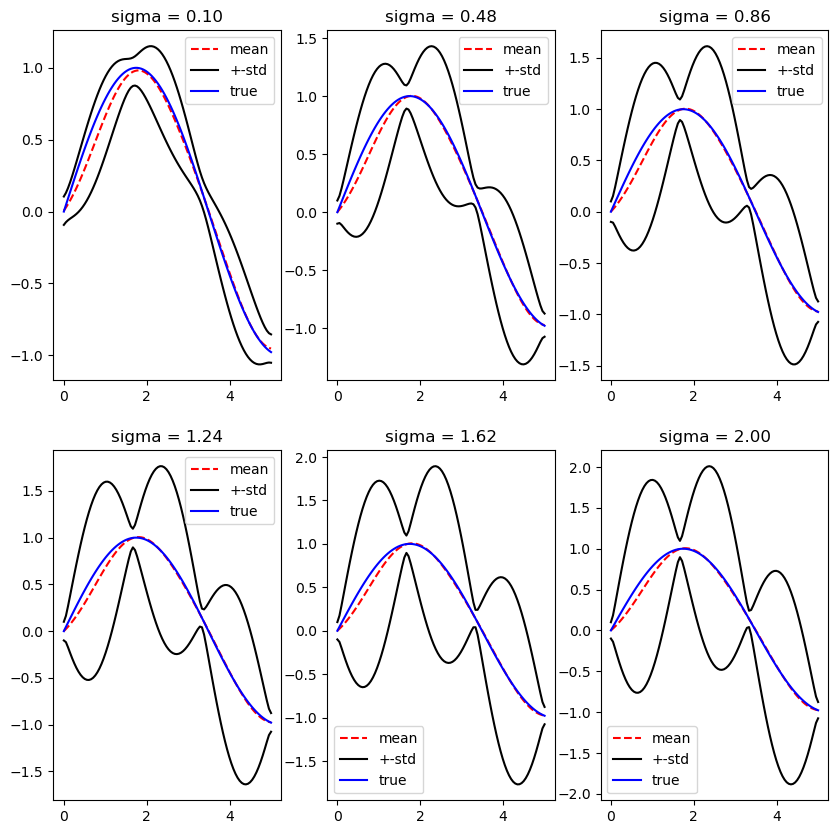

In [14]:
fig, axs = plt.subplots(2,3, figsize=(10, 10))
obs = np.array([4])
sigma_values = np.linspace(0.1,2,6)
l=1
# i=4
# axs[0,0].plot(GPR(obs[n],100,sigma[i],l)[0],GPR(obs[n],100,sigma[i],l)[1],'r--',label="mean")
# axs[0,0].plot(GPR(obs[n],100,sigma[i],l)[0],GPR(obs[n],100,sigma[i],l)[1]+2*GPR(4,100,sigma[i],l)[2],color='black',label="+-std")
# axs[0,0].plot(GPR(obs[n],100,sigma[i],l)[0],GPR(obs[n],100,sigma[i],l)[1]-2*GPR(4,100,sigma[i],l)[2],color='black')
# axs[0,0].plot(GPR(obs[n],100,sigma[i],l)[0],f(GPR(obs[n],100,sigma[i],l)[0]),color='blue',label='true')
# axs[0,0].set_title("sigma = %.0f"%sigma[i])
for row in range(2):
    for col in range(3):
        i = row * 3 + col  # Calculate the index based on row and column
        if i < len(sigma_values):  # Ensure we don't exceed the available sigma values
            ax = axs[row, col]
            ax.plot(GPR(obs[0], 100, sigma_values[i], l)[0], 
                    GPR(obs[0], 100, sigma_values[i], l)[1], 'r--', label="mean")
            ax.plot(GPR(obs[0], 100, sigma_values[i], l)[0], 
                    GPR(obs[0], 100, sigma_values[i], l)[1] + 2 * GPR(4, 100, sigma_values[i], l)[2], 
                    color='black', label="+-std")
            ax.plot(GPR(obs[0], 100, sigma_values[i], l)[0], 
                    GPR(obs[0], 100, sigma_values[i], l)[1] - 2 * GPR(4, 100, sigma_values[i], l)[2], 
                    color='black')
            ax.plot(GPR(obs[0], 100, sigma_values[i], l)[0], 
                    f(GPR(obs[0], 100, sigma_values[i], l)[0]), 
                    color='blue', label='true')
            ax.set_title(f"sigma = {sigma_values[i]:.2f}")  # Set title for each subplot
            ax.legend()


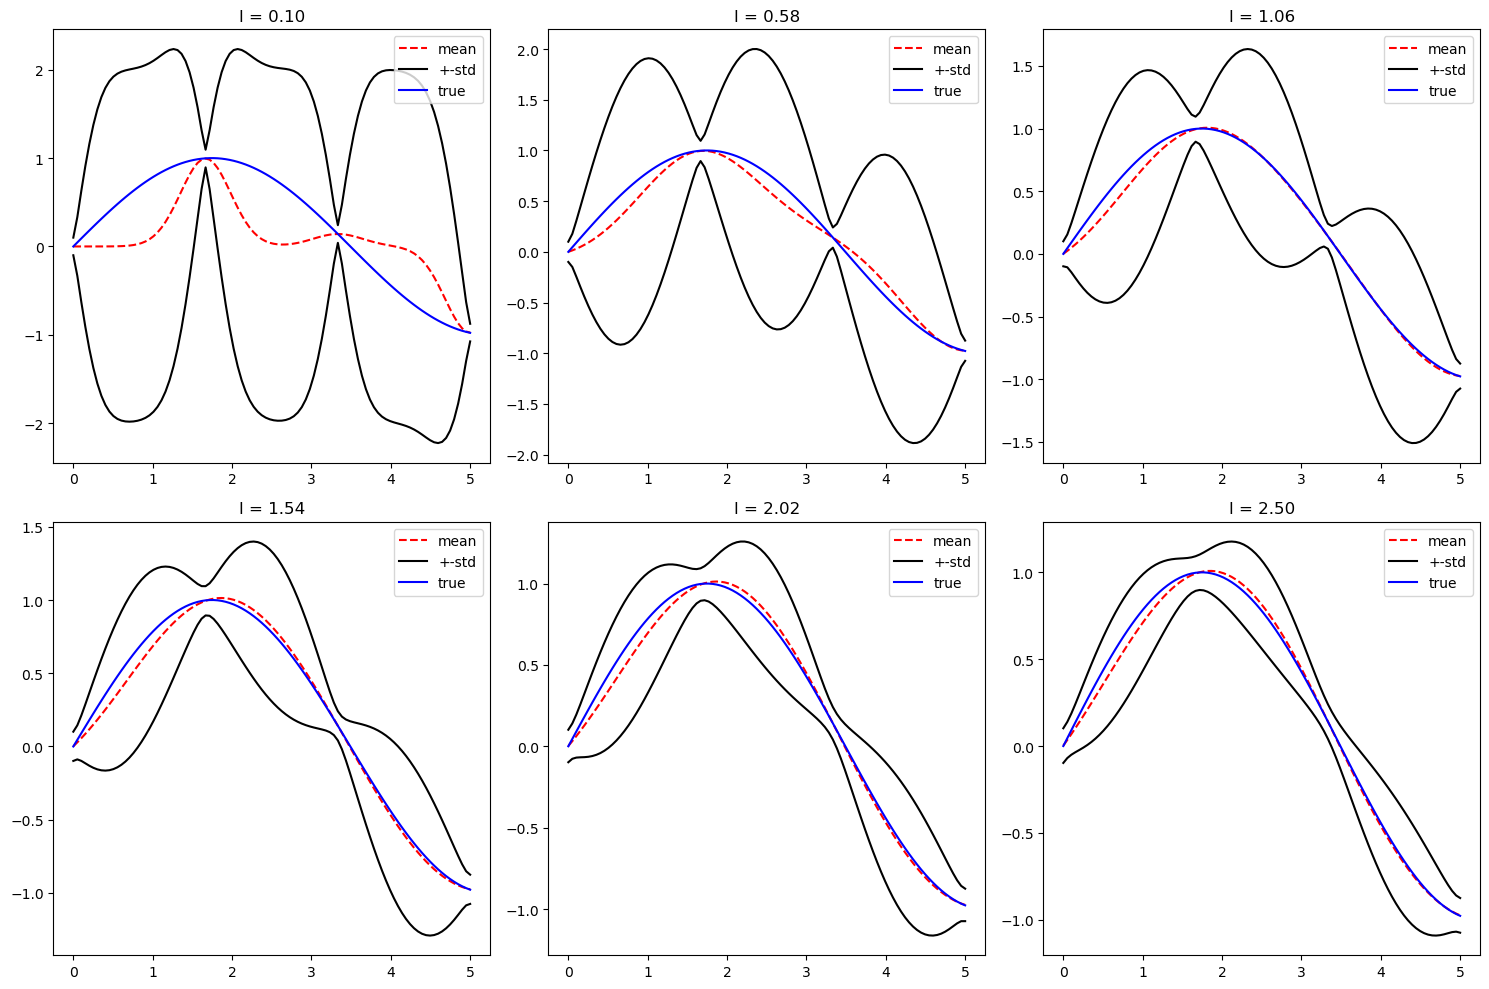

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Adjust to accommodate all l values
obs = np.array([4])  # Number of observations
l_values = np.linspace(0.1, 2.5, 6)  # Varying l values from 0 to 1
sigma = 1  # Keep sigma constant at 1

# Loop through rows and columns to plot
for row in range(2):
    for col in range(3):
        i = row * 3 + col  # Calculate the index based on row and column
        if i < len(l_values):  # Ensure we don't exceed the available l values
            ax = axs[row, col]
            ax.plot(GPR(obs[0], 100, sigma, l_values[i])[0], 
                    GPR(obs[0], 100, sigma, l_values[i])[1], 'r--', label="mean")
            ax.plot(GPR(obs[0], 100, sigma, l_values[i])[0], 
                    GPR(obs[0], 100, sigma, l_values[i])[1] + 2 * GPR(4, 100, sigma, l_values[i])[2], 
                    color='black', label="+-std")
            ax.plot(GPR(obs[0], 100, sigma, l_values[i])[0], 
                    GPR(obs[0], 100, sigma, l_values[i])[1] - 2 * GPR(4, 100, sigma, l_values[i])[2], 
                    color='black')
            ax.plot(GPR(obs[0], 100, sigma, l_values[i])[0], 
                    f(GPR(obs[0], 100, sigma, l_values[i])[0]), 
                    color='blue', label='true')
            ax.set_title(f"l = {l_values[i]:.2f}")  # Set title for each subplot
            ax.legend()

# Adjust layout to fit all subplots and legends
plt.tight_layout()
plt.show()

# Optimising Parameter Selection

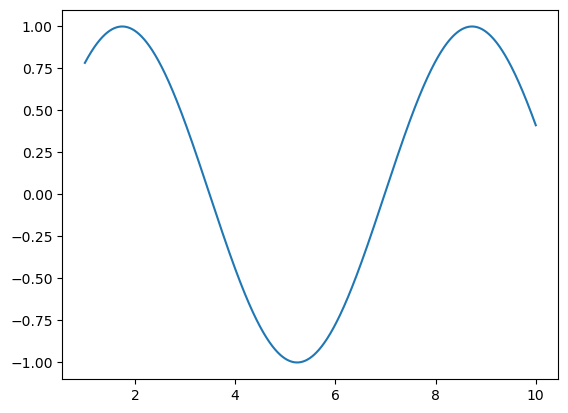

In [17]:
# The true function
def f(x):
    return np.sin(0.9*x)
x = np.linspace(1,10,1000)

plt.plot(x,f(x))
plt.show()

In [18]:
def Kernel(a,b,sigma,l):
    # we take len(a) = len(b)
    n= len(a)
    q= len(b)
    sqrdist = np.zeros((n,q))
    for j in range(0,n):
        for i in range(0,q):
           sqrdist[j,i] = (a[j]-b[i])**2 
    return sigma*np.exp(-1/(2*l**2)*(sqrdist))

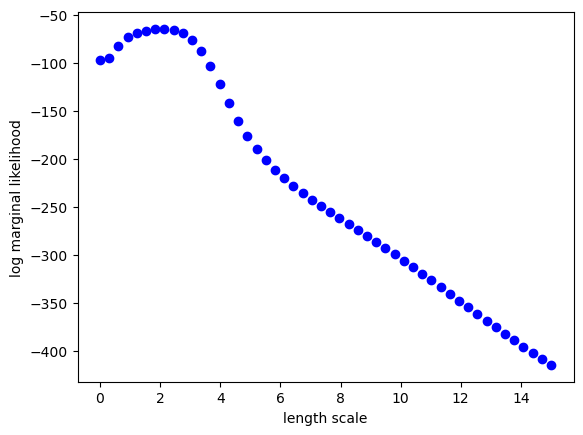

In [19]:
l=np.linspace(0.001,15,50)
for l in l:
    sigma=1
    noise= 0.1
    Nobs = 20
    Ntest = 100
    x = np.linspace(1,10,Nobs)
    y = f(x)
    Xtest = np.linspace(1,10,Ntest)
    # sigma = noise level
    #L = np.linalg.cholesky(Kernel(x,x)+sigma**2*np.identity(n)**2)
    A = Kernel(x,x,sigma,l)+noise**2*np.identity(Nobs)
    ## This produces a matrix such that L*Lt = Kernel(x,x)+sigma**2*np.identity(n)**2
    Ainv =np.linalg.inv(A)
    fstar = Kernel(Xtest,x,sigma,l)@Ainv@y
    varf = Kernel(Xtest,Xtest,sigma,l)-Kernel(Xtest,x,sigma,l)@Ainv@Kernel(x,Xtest,sigma,l)
    varfxtest = varf.diagonal()
    std=np.sqrt(varfxtest)
    loglike = -1/2*y.T@Ainv@y-1/2*np.log(np.linalg.det(A))-Ntest/2*np.log(2*np.pi)
    plt.scatter(l,loglike,color='blue')
    plt.ylabel('log marginal likelihood')
    plt.xlabel('length scale')

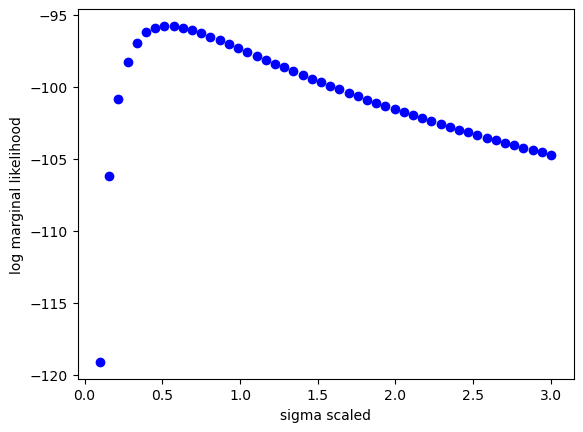

In [20]:
sigmas = np.linspace(0.1,3,50)
for sigma in sigmas:
    l=0.1
    noise= 0.1
    Nobs =20
    Ntest = 100
    x = np.linspace(1,10,Nobs)
    y = f(x)
    Xtest = np.linspace(1,10,Ntest)
    # sigma = noise level
    #L = np.linalg.cholesky(Kernel(x,x)+sigma**2*np.identity(n)**2)
    A = Kernel(x,x,sigma,l)+noise**2*np.identity(Nobs)
    ## This produces a matrix such that L*Lt = Kernel(x,x)+sigma**2*np.identity(n)**2
    Ainv =np.linalg.inv(A)
    fstar = Kernel(Xtest,x,sigma,l)@Ainv@y
    varf = Kernel(Xtest,Xtest,sigma,l)-Kernel(Xtest,x,sigma,l)@Ainv@Kernel(x,Xtest,sigma,l)
    varfxtest = varf.diagonal()
    std=np.sqrt(varfxtest)
    loglike = -1/2*y.T@Ainv@y-1/2*np.log(np.linalg.det(A))-Ntest/2*np.log(2*np.pi)
    plt.scatter(sigma,loglike,color='blue')
    plt.ylabel('log marginal likelihood')
    plt.xlabel('sigma scaled')

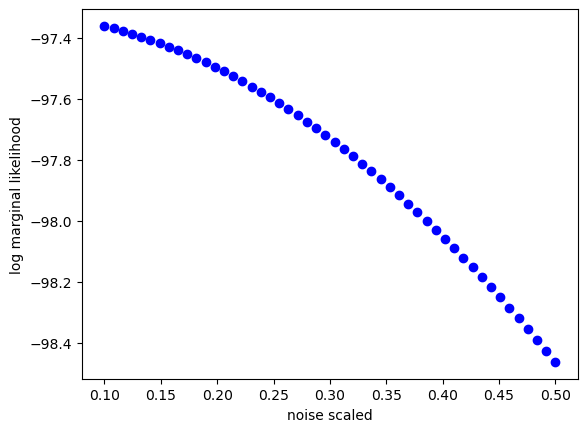

In [21]:
noises = np.linspace(0.1,.5,50)
for noise in noises:
    l=0.1
    sigma = 1
    Nobs =20
    Ntest = 100
    x = np.linspace(1,10,Nobs)
    y = f(x)
    Xtest = np.linspace(1,10,Ntest)
    # sigma = noise level
    #L = np.linalg.cholesky(Kernel(x,x)+sigma**2*np.identity(n)**2)
    A = Kernel(x,x,sigma,l)+noise**2*np.identity(Nobs)
    ## This produces a matrix such that L*Lt = Kernel(x,x)+sigma**2*np.identity(n)**2
    Ainv =np.linalg.inv(A)
    fstar = Kernel(Xtest,x,sigma,l)@Ainv@y
    varf = Kernel(Xtest,Xtest,sigma,l)-Kernel(Xtest,x,sigma,l)@Ainv@Kernel(x,Xtest,sigma,l)
    varfxtest = varf.diagonal()
    std=np.sqrt(varfxtest)
    loglike = -1/2*y.T@Ainv@y-1/2*np.log(np.linalg.det(A))-Ntest/2*np.log(2*np.pi)
    plt.scatter(noise,loglike,color='blue')
    plt.ylabel('log marginal likelihood')
    plt.xlabel('noise scaled')

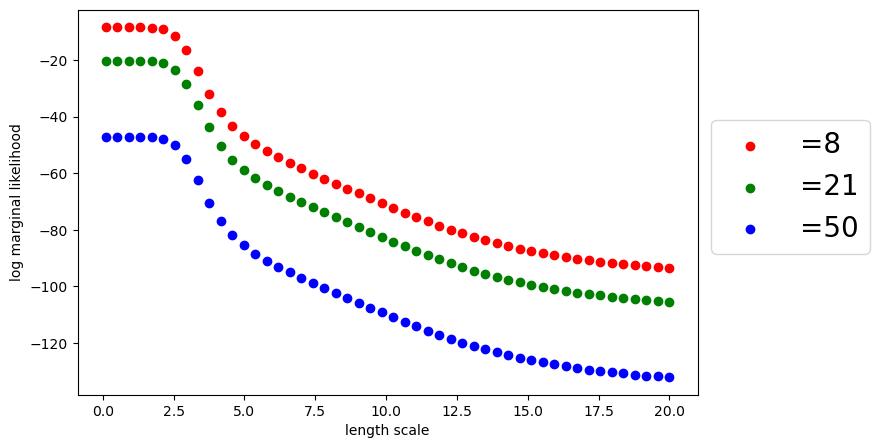

In [22]:
plt.figure(figsize=(8,5))
Ntests = np.array([8,21,50])
colors = np.array(["red","green","blue"])
i=0
while(i<len(Ntests)):
    Ntest=Ntests[i]
    c=colors[i]
    l=np.linspace(0.1,20,50)
    j=0
    for l in l:
            sigma=1
            noise= 0.1
            Nobs =5
            x = np.linspace(1,10,Nobs)
            y = f(x)
            Xtest = np.linspace(1,10,Ntest)
            # sigma = noise level
            #L = np.linalg.cholesky(Kernel(x,x)+sigma**2*np.identity(n)**2)
            A = Kernel(x,x,sigma,l)+noise**2*np.identity(Nobs)
            ## This produces a matrix such that L*Lt = Kernel(x,x)+sigma**2*np.identity(n)**2
            Ainv =np.linalg.inv(A)
            fstar = Kernel(Xtest,x,sigma,l)@Ainv@y
            varf = Kernel(Xtest,Xtest,sigma,l)-Kernel(Xtest,x,sigma,l)@Ainv@Kernel(x,Xtest,sigma,l)
            varfxtest = varf.diagonal()
            std=np.sqrt(varfxtest)
            loglike = -1/2*y.T@Ainv@y-1/2*np.log(np.linalg.det(A))-Ntest/2*np.log(2*np.pi)
            if(j==0):
                plt.scatter(l,loglike,color=c,label="=%.0f"%Ntest)
            else:
                plt.scatter(l,loglike,color=c)
            j+=1
    i+=1

plt.legend(bbox_to_anchor=(1, 0.75), 
           prop={'size':20})
plt.ylabel('log marginal likelihood')
plt.xlabel('length scale')
plt.show()

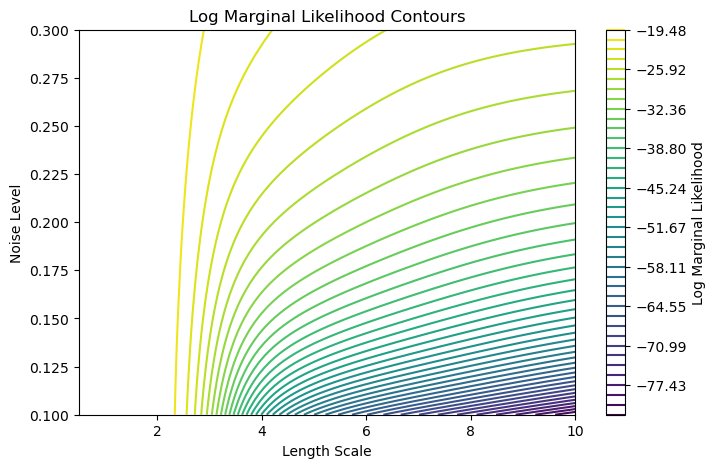

In [23]:
plt.figure(figsize=(8,5))
Noises = np.linspace(0.1,0.3,100)
loglike = np.zeros((100,100))
#colors = np.array(["red","green","blue"])
i=0
while(i<len(Noises)):
    noise = Noises[i]
    #c=colors[i]
    length_scale_values=np.linspace(0.5,10,100)
    j=0
    for l in length_scale_values:
            sigma=1
            Nobs = 5
            Ntest = 20
            x = np.linspace(1,10,Nobs)
            y = f(x)
            Xtest = np.linspace(1,10,Ntest)
            # sigma = noise level
            #L = np.linalg.cholesky(Kernel(x,x)+sigma**2*np.identity(n)**2)
            A = Kernel(x,x,sigma,l)+noise**2*np.identity(Nobs)
            ## This produces a matrix such that L*Lt = Kernel(x,x)+sigma**2*np.identity(n)**2
            Ainv =np.linalg.inv(A)
            fstar = Kernel(Xtest,x,sigma,l)@Ainv@y
            varf = Kernel(Xtest,Xtest,sigma,l)-Kernel(Xtest,x,sigma,l)@Ainv@Kernel(x,Xtest,sigma,l)
            varfxtest = varf.diagonal()
            std=np.sqrt(varfxtest)
            loglike[i,j] = -1/2*y.T@Ainv@y-1/2*np.log(np.linalg.det(A))-Ntest/2*np.log(2*np.pi)
            j+=1
    i+=1
    

#length_scale_values = np.linspace(0.1, 4, 50)
noise_values = Noises
L, N = np.meshgrid(length_scale_values, noise_values)

# Plotting log marginal likelihood
levels=np.linspace(loglike.min(), loglike.max(), 40)
plt.contour(L, N, loglike,levels=levels) 
plt.colorbar(label='Log Marginal Likelihood')  # Color bar
plt.xlabel('Length Scale')
plt.ylabel('Noise Level')
plt.title('Log Marginal Likelihood Contours')
plt.show()

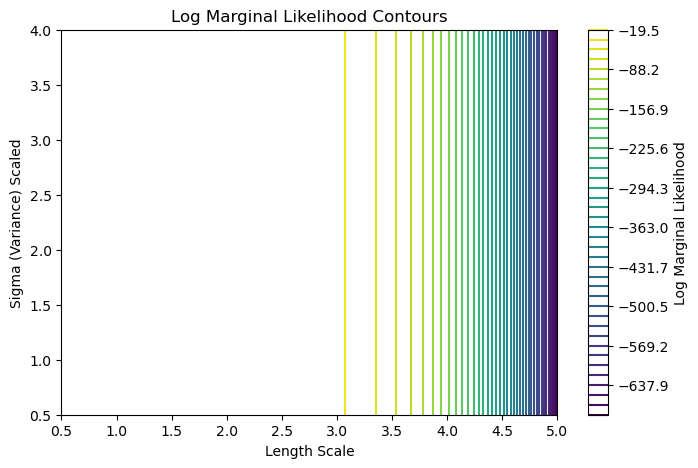

In [24]:
plt.figure(figsize=(8,5))
sigmas = np.linspace(0.5,4,100)
loglike = np.zeros((100,100))
#colors = np.array(["red","green","blue"])
i=0
while(i<len(sigmas)):
    sigma = sigmas[i]
    #c=colors[i]
    length_scale_values=np.linspace(0.5,5,100)
    j=0
    for l in length_scale_values:
            sigma=1
            noise= 0.01
            Nobs = 5
            Ntest = 20
            x = np.linspace(1,10,Nobs)
            y = f(x)
            Xtest = np.linspace(1,10,Ntest)
            # sigma = noise level
            #L = np.linalg.cholesky(Kernel(x,x)+sigma**2*np.identity(n)**2)
            A = Kernel(x,x,sigma,l)+noise**2*np.identity(Nobs)
            ## This produces a matrix such that L*Lt = Kernel(x,x)+sigma**2*np.identity(n)**2
            Ainv =np.linalg.inv(A)
            fstar = Kernel(Xtest,x,sigma,l)@Ainv@y
            varf = Kernel(Xtest,Xtest,sigma,l)-Kernel(Xtest,x,sigma,l)@Ainv@Kernel(x,Xtest,sigma,l)
            varfxtest = varf.diagonal()
            std=np.sqrt(varfxtest)
            loglike[i,j] = -1/2*y.T@Ainv@y-1/2*np.log(np.linalg.det(A))-Ntest/2*np.log(2*np.pi)
            j+=1
    i+=1
    


L, N = np.meshgrid(length_scale_values, sigmas)

# Plotting log marginal likelihood
levels=np.linspace(loglike.min(), loglike.max(), 40)
plt.contour(L, N, loglike,levels=levels) 
plt.colorbar(label='Log Marginal Likelihood')  # Color bar
plt.xlabel('Length Scale')
plt.ylabel('Sigma (Variance) Scaled')
plt.title('Log Marginal Likelihood Contours')
plt.show()

In [151]:
from scipy.optimize import minimize

def marglike(par,X,Y):
  # print(par)
  l,var,sigma_n = par
  n = len(X)
  dist_X = (X - X.T)**2
  # print(dist_X)
  k = var*np.exp(-(1/(2*(l**2)))*dist_X)
  inverse = np.linalg.inv(k + (sigma_n**2)*np.eye(len(k))) 
  ml = (1/2)*np.dot(np.dot(Y.T,inverse),Y) + (1/2)*np.log(np.linalg.det(k + (sigma_n**2)*np.eye(len(k)))) + (n/2)*np.log(2*np.pi)
  return ml

X = np.linspace(1,10,20).reshape(-1,1) # Reshaping
F = np.sin(X)
start = np.array([1.11,1.6,0.05]) #initial parameters values
#print(marglike(start,X,F))

re = minimize(marglike,start,args=(X,F),method="L-BFGS-B",options = {'disp':True})
l = re.x[0]
sigma = re.x[1] # This is the variance 
noise = re.x[2]
print(l,sigma,noise)

2.2819352277220606 1.5080233591377534 3.2119409946975206e-07


# Using these in a GR process

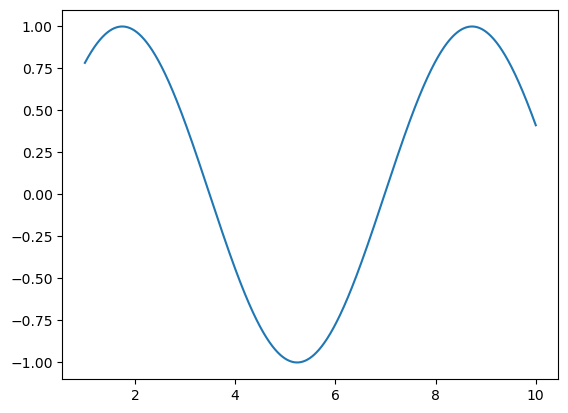

In [154]:
# The true function
def f(x):
    return np.sin(0.9*x)
x = np.linspace(1,10,1000)

plt.plot(x,f(x))
plt.show()

In [207]:
def Kernel(a,b,sigma,l):
    # we take len(a) = len(b)
    n= len(a)
    q= len(b)
    sqrdist = np.zeros((n,q))
    for j in range(0,n):
        for i in range(0,q):
           sqrdist[j,i] = (a[j]-b[i])**2 
    return sigma*np.exp(-1/(2*l**2)*(sqrdist))

In [209]:
def GPR(Nobs,Ntest,sigma,l,noise):
    x = np.linspace(1,10,Nobs)
    y = f(x)
    Xtest = np.linspace(1,10,Ntest)
    #L = np.linalg.cholesky(Kernel(x,x)+sigma**2*np.identity(n)**2)
    A = Kernel(x,x,sigma,l)+noise**2*np.identity(Nobs)
    ## This produces a matrix such that L*Lt = Kernel(x,x)+sigma**2*np.identity(n)**2
    Ainv =np.linalg.inv(A)
    fstar = Kernel(Xtest,x,sigma,l)@Ainv@y
    varf = Kernel(Xtest,Xtest,sigma,l)-Kernel(Xtest,x,sigma,l)@Ainv@Kernel(x,Xtest,sigma,l)
    varfxtest = np.abs(varf.diagonal())
    std=np.sqrt(varfxtest)
    return Xtest,fstar,std,x

In [219]:
noise=0
x= GPR(5,20,sigma,l,noise)[3]
Xtest = GPR(5,20,sigma,l,noise)[0]
fstar = GPR(5,20,sigma,l,noise)[1]
std = GPR(5,20,sigma,l,noise)[2]

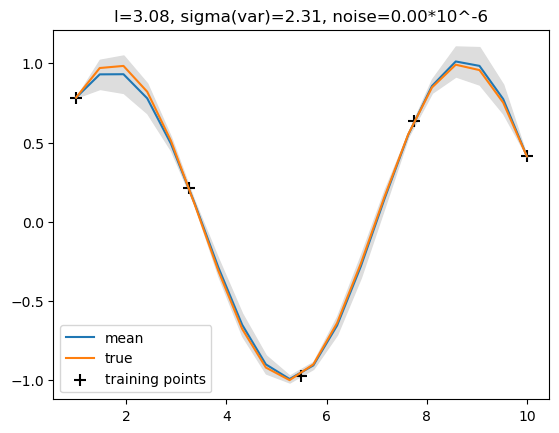

In [221]:
plt.plot(Xtest,fstar, label='mean')
plt.plot(Xtest,f(Xtest), label = 'true')
plt.gca().fill_between(Xtest, fstar-2*std, fstar+2*std, color="#dddddd")
plt.scatter(x,f(x),marker='+',color='black',s=80,label = 'training points')
plt.title("l=%0.2f, sigma(var)=%0.2f, noise=%0.2f*10^-6"%(l,sigma,(10**6*noise)))
plt.legend()

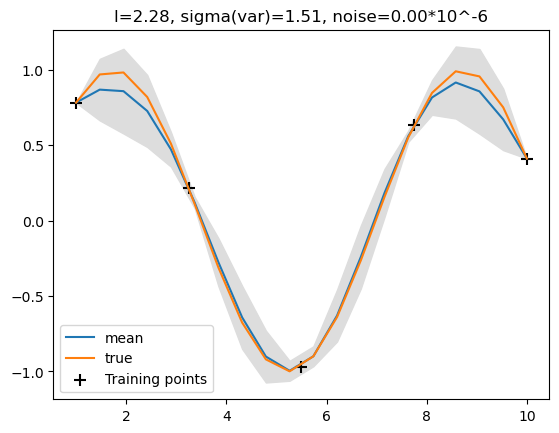

In [200]:
sigma = sigma-0.4
l=l-0.4
Xtest = GPR(5,20,sigma,l,noise)[0]
fstar = GPR(5,20,sigma,l,noise)[1]
std = GPR(5,20,sigma,l,noise)[2]
plt.plot(Xtest,fstar, label='mean')
plt.plot(Xtest,f(Xtest), label = 'true')
plt.gca().fill_between(Xtest, fstar-2*std, fstar+2*std, color="#dddddd")
plt.scatter(x,f(x),marker='+',color='black',s=80,label="Training points")
plt.title("l=%0.2f, sigma(var)=%0.2f, noise=%0.2f*10^-6"%(l,sigma,(10**6*noise)))
plt.legend()

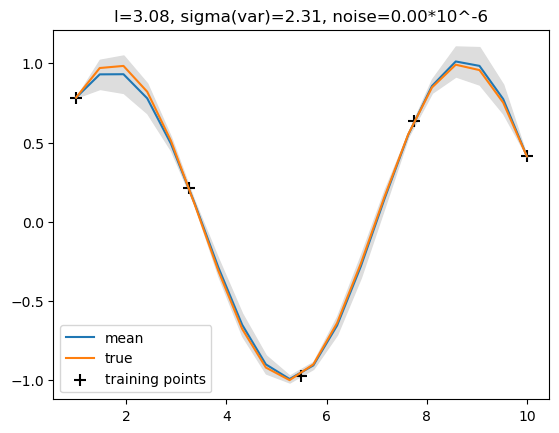

In [202]:
sigma = sigma+0.8
l=l+0.8
Xtest = GPR(5,20,sigma,l,noise)[0]
fstar = GPR(5,20,sigma,l,noise)[1]
std = GPR(5,20,sigma,l,noise)[2]
plt.plot(Xtest,fstar, label='mean')
plt.plot(Xtest,f(Xtest), label = 'true')
plt.gca().fill_between(Xtest, fstar-2*std, fstar+2*std, color="#dddddd")
plt.scatter(x,f(x),marker='+',color='black',s=80,label = 'training points')
plt.title("l=%0.2f, sigma(var)=%0.2f, noise=%0.2f*10^-6"%(l,sigma,(10**6*noise)))
plt.legend()

# Doing an animation 

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns
l = re.x[0]
sigma = re.x[1] # This is the variance 
noise = re.x[2]

In [273]:
import random
import numpy as np
import operator
import math
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display 

import matplotlib.animation as anim
from IPython.display import HTML
plt.rcParams["animation.html"] = "jshtml"
#linestyle2=np.array(['solid','dotted','dashed','dashdot'])
def change(Numobs):

    fig, ax = plt.subplots(figsize = (8,5))

    #ax.set_aspect('equal')

    def animate(n): #Animation function
        while(n<len(Numobs)):
            ax.cla() 
            i=0
            noise=0
            x= GPR(Numobs[n],20,sigma,l,noise)[3]
            Xtest = GPR(Numobs[n],20,sigma,l,noise)[0]
            fstar = GPR(Numobs[n],20,sigma,l,noise)[1]
            std = GPR(Numobs[n],20,sigma,l,noise)[2]
            plt.plot(Xtest,fstar, label='mean')
            plt.plot(Xtest,f(Xtest), label = 'true')
            plt.gca().fill_between(Xtest, fstar-2*std, fstar+2*std, color="#dddddd")
            plt.scatter(x,f(x),marker='+',color='black',s=80,label = 'training points')
            plt.title("l=%0.2f, sigma(var)=%0.2f, noise=%0.2f*10^-6"%(l,sigma,(10**6*noise)))
            plt.legend()
            fig.suptitle("Number of Observations = %.0f"%Numobs[n])
            ax.set_ylim((-3,3))
            return ax
    return anim.FuncAnimation(fig, animate,frames=len(Numobs)-1, interval=1000)

[1 2 3 4 5 6 7 8 9]


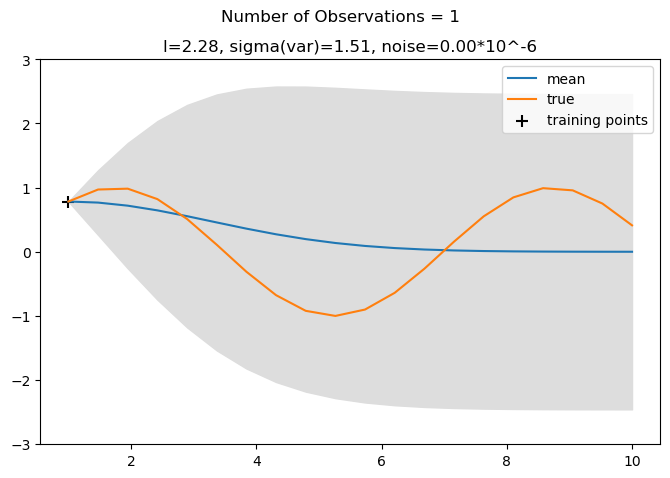

In [277]:
Numobs = np.arange(1,10,1)
print(Numobs)
change(Numobs)